# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

---
## 2. Load data

In [2]:
client_df = pd.read_csv('client_data_after_eda.csv')

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df = pd.read_csv('price_data_after_eda.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [5]:
price_df.shape

(193002, 8)

---

## 3. Feature engineering

### We will create 3 different sets of price features to measure sensitivity as proposed in the EDA 

### 1) Mean of the prices (fixed & variable) from preceding year (January to December 2015)
### 2) Difference between prices (fixed & variable) from January to December 2015
### 3) Variance in prices (fixed & variable) from January to December 2015

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
# Group prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).mean().reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
...,...,...,...,...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555


In [7]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = dec_prices.iloc[:,2:] - jan_prices.iloc[:,2:]

# rename the columns
col_list = ['diff_'+col for col in diff.columns]
diff.columns = col_list
diff.insert(loc=0, column='id', value=dec_prices.id)

In [8]:
# Also calculate the mean prices & variance in prices for the period  

mean_prices = monthly_price_by_id.groupby('id').mean().reset_index().iloc[:,1:]
col_list = ['mean_'+col for col in mean_prices.columns]
mean_prices.columns = col_list

var_prices = monthly_price_by_id.groupby('id').var().reset_index().iloc[:,1:]
col_list = ['var_'+col for col in var_prices.columns]
var_prices.columns = col_list

In [9]:
mean_var = pd.concat([mean_prices, var_prices], axis=1)
price_df = pd.concat([diff, mean_var], axis=1)
price_df

,id,diff_price_off_peak_var,diff_price_peak_var,diff_price_mid_peak_var,diff_price_off_peak_fix,diff_price_peak_fix,diff_price_mid_peak_fix,mean_price_off_peak_var,mean_price_peak_var,mean_price_mid_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,mean_price_mid_peak_fix,var_price_off_peak_var,var_price_peak_var,var_price_mid_peak_var,var_price_off_peak_fix,var_price_peak_fix,var_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,0.000000,0.000000,1.500000,0.000000,0.000000,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,-0.005120,0.000763,0.162916,0.097749,0.065166,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158
4,00114d74e963e47177db89bc70108537,-0.003994,0.000000,0.000000,-0.000001,0.000000,0.000000,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.038788,-0.022735,-0.335085,-0.400251,-0.432834,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,0.000688,0.000422,1.563148e-04,3.062232e-02,0.043691,0.051094
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.000000,0.000000,0.177779,0.000000,0.000000,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0.000004,0.000000,0.000000e+00,6.464760e-03,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,-0.003707,-0.007326,0.164916,0.099749,0.067166,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0.000009,0.000006,1.857770e-05,7.211360e-03,0.002638,0.001196
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,-0.004937,0.001029,0.162916,0.097749,0.065166,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0.000021,0.000006,2.220744e-07,5.428835e-03,0.001954,0.000869


In [10]:
price_df.isnull().sum()

id                         0
diff_price_off_peak_var    0
diff_price_peak_var        0
diff_price_mid_peak_var    0
diff_price_off_peak_fix    0
diff_price_peak_fix        0
diff_price_mid_peak_fix    0
mean_price_off_peak_var    0
mean_price_peak_var        0
mean_price_mid_peak_var    0
mean_price_off_peak_fix    0
mean_price_peak_fix        0
mean_price_mid_peak_fix    0
var_price_off_peak_var     0
var_price_peak_var         0
var_price_mid_peak_var     0
var_price_off_peak_fix     0
var_price_peak_fix         0
var_price_mid_peak_fix     0
dtype: int64

### Date Features

### Since it's difficult to work directly with the date data, we will convert date columns into number of months/years from each date to the reference date of our data (January 2016)

In [11]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], format='%Y-%m-%d')
client_df['date_end'] = pd.to_datetime(client_df['date_end'], format='%Y-%m-%d')
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'], format='%Y-%m-%d')
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'], format='%Y-%m-%d')

In [12]:
# Convert date columns into number of months from each date to the reference date of our data (January 2016)

for col in ['date_activ','date_end','date_modif_prod','date_renewal']:   
    col_name = col.split('_')[1]
    reference_date = datetime.datetime(2016,1,1)
    time_delta = reference_date - client_df['date_activ']
    client_df['months_'+col_name] = (time_delta / np.timedelta64(1, "M")).astype(int)
client_df.drop(['date_activ','date_end','date_modif_prod','date_renewal'], 1, inplace=True)

## 4. Encoding of Features

In [13]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,months_activ,months_end,months_modif,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,30,30,30,30
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,76,76,76,76
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,68,68,68,68
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,69,69,69,69
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,71,71,71,71


In [14]:
# Do One-Hot encoding for channel_sales and origin_up

dummies_channel_sales = pd.get_dummies(client_df['channel_sales'])

dummies_origin_up = pd.get_dummies(client_df['origin_up'])

In [15]:
dummies_channel_sales.drop('MISSING', 1, inplace=True)

# simplifying column names

col_list = ['channel_'+col[:4] for col in dummies_channel_sales.columns]
dummies_channel_sales.columns = col_list
dummies_channel_sales

,channel_epum,channel_ewpa,channel_fixd,channel_foos,channel_lmke,channel_sddi,channel_usil
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
14601,0,0,0,1,0,0,0
14602,0,0,0,1,0,0,0
14603,0,0,0,1,0,0,0
14604,0,0,0,1,0,0,0


In [16]:
dummies_origin_up.drop('MISSING', 1, inplace=True)

# simplifying column names

col_list = ['origin_'+col[:4] for col in dummies_origin_up.columns]
dummies_origin_up.columns = col_list
dummies_origin_up


client_df.drop(['channel_sales','origin_up'], axis=1, inplace=True)

# label encoding of 'has_gas' column

client_df.has_gas.replace({'f':0,'t':1}, inplace=True)

In [17]:
client_df = pd.concat([client_df, dummies_channel_sales, dummies_origin_up], axis=1)
client_df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_fixd,channel_foos,channel_lmke,channel_sddi,channel_usil,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,1,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,1,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,0,1,0,0,0,0,0,0,1,0
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,0,1,0,0,0,0,0,0,1,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,0,1,0,0,0,0,0,0,1,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,0,1,0,0,0,0,0,0,1,0


In [18]:
# Finally merge it with price features obtained earlier

client_prices = pd.merge(client_df, price_df, how='left', on='id')
client_prices

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,mean_price_mid_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,mean_price_mid_peak_fix,var_price_off_peak_var,var_price_peak_var,var_price_mid_peak_var,var_price_off_peak_fix,var_price_peak_fix,var_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0.066530,40.942265,22.352010,14.901340,0.000061,2.627605e-05,4.402763e-04,1.102785e+00,49.550703,22.022535
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.000000,44.311375,0.000000,0.000000,0.000005,6.089453e-04,0.000000e+00,6.464779e-03,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.000000,44.385450,0.000000,0.000000,0.000006,2.558511e-07,0.000000e+00,7.661891e-03,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000,44.400265,0.000000,0.000000,0.000005,0.000000e+00,0.000000e+00,6.464721e-03,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0.072865,40.688156,24.412893,16.275263,0.000015,3.552481e-06,2.522046e-06,5.428942e-03,0.001954,0.000869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,0.000000,44.370635,0.000000,0.000000,0.000015,0.000000e+00,0.000000e+00,8.380216e-03,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,0.070817,59.015674,36.393379,8.345418,0.000013,3.472391e-06,1.638788e-08,1.358132e-02,0.005165,0.000272
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,0.073160,40.701732,24.421038,16.280694,0.000016,3.957295e-06,1.871602e-06,4.021438e-03,0.001448,0.000643
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,0.000000,44.311375,0.000000,0.000000,0.000005,6.089453e-04,0.000000e+00,6.464769e-03,0.000000,0.000000


In [19]:
# Removing outliers from numerical features
# There are two methods for removing outliers - a) using z score method & b) using iqr method

client_prices_num = client_prices.select_dtypes(include = ['float64','int64']).drop('churn',1)

# We will be using iqr method

q1 = client_prices_num.quantile(0.25)
q3 = client_prices_num.quantile(0.75)
iqr = q3-q1


client_prices_out = client_prices[~((client_prices_num < q1-1.5*iqr) | (client_prices_num > q3+1.5*iqr)).any(axis=1)]
client_prices_out.isnull().sum().sum()

# There are no null values in the final dataframe

0

In [20]:
# Final list of features

client_prices.dtypes

id                                 object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                             int64
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
pow_max                           float64
churn                               int64
months_activ                        int32
months_end                          int32
months_modif                        int32
months_renewal                    

## 5. Modelling

#### We will use Random Forest Classifier of sklearn to build our model. 
#### Random Forest Classifier (RFC) is an ensemble based model which works on the principle of bagging of decision tree models. It aggregates the results of multiple DT models working on different subsets of data.

#### Advantages - 1) improves predicton by aggregating the results of several models and giving the average.
#### 2) Ensemble models are  ideal when there are large no of features with low/unknown predictive power.  
#### 3) They are less sensitive to outliers and non-linearity in features.

#### Disadvantages - 1) Interpretation of results is more difficult 2) takes more time for training

In [21]:
X = client_prices.drop(['id','churn'], 1)
y = client_prices['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10954, 52) (3652, 52)
(10954,) (3652,)


In [22]:
y_train.value_counts()

0    9851
1    1103
Name: churn, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 10)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9851
           1       1.00      1.00      1.00      1103

    accuracy                           1.00     10954
   macro avg       1.00      1.00      1.00     10954
weighted avg       1.00      1.00      1.00     10954



In [25]:
print(classification_report(y_test, y_test_pred))

df_scores = pd.DataFrame(columns = ['Precision','Recall','f1-score','Accuracy','Kappa'])
df_scores.loc['Random Forest'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]
df_scores

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3336
           1       0.75      0.06      0.11       316

    accuracy                           0.92      3652
   macro avg       0.83      0.53      0.53      3652
weighted avg       0.90      0.92      0.88      3652



,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.75,0.056962,0.105882,0.916758,0.094825


In [26]:
# Comparing with an XGBoost model to assess the relative performance of both

import xgboost
xgb = xgboost.XGBClassifier(n_estimators = 100, random_state = 12)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
print(classification_report(y_test, y_test_pred))

df_scores.loc['XGBoost'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]
df_scores

[01:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3336
           1       0.48      0.10      0.17       316

    accuracy                           0.91      3652
   macro avg       0.70      0.55      0.56      3652
weighted avg       0.88      0.91      0.89      3652



,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.750000,0.056962,0.105882,0.916758,0.094825
XGBoost,0.478261,0.104430,0.171429,0.912651,0.144908


### Model Evaluation

### We will use the precision and recall for 1's (churned) as the evaluation metric for our model.

### A high precision means that most of the predicted "churns" were correct while recall gives the proportion of actual "churns" that were correctly predicted. In any good classification model, there has to be a tradeoff between precision and recall, one increases as the other decreases 

### Since our dataset is highly imbalanced, we expect the model to correctly predict many of the 0's even if its a poor one. Hence accuracy is a poor evaluation metric in this case.

### Although our model has accurately predicted the 0's (No churn), the recall for 1's (churn) is very low
### Overfitting is present as the model precision & recall (1's) for test data is much lesser than those obtained for train set

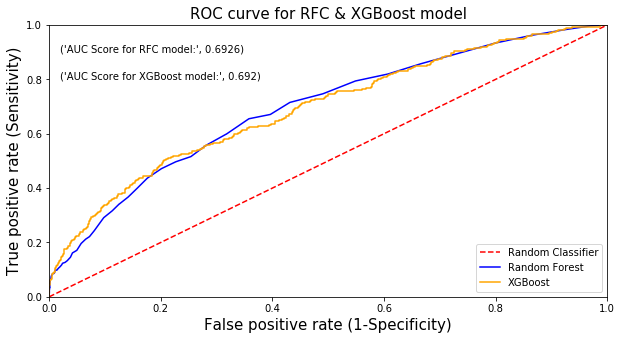

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10,5))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob)
plt.plot(fpr1, tpr1, color='blue')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for RFC model:',round(roc_auc_score(y_test, y_pred_prob),4)))

y_pred_prob = xgb.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob)
plt.plot(fpr2, tpr2, color='orange')
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for XGBoost model:',round(roc_auc_score(y_test, y_pred_prob),4)))

## Labelling
plt.title('ROC curve for RFC & XGBoost model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(['Random Classifier','Random Forest','XGBoost'], loc='lower right')
plt.show()

### Receiver Operating Characteristics (ROC) curve is another useful way to visualize the ability of a model to separate the target classes. It plots the True Positive Rate against False Positive Rate for a set of thresholds
### From the ROC curve & auc score, the model shows good separability between classes
### XGBoost model and RFC model performance have similar performance based on auc scores.

### Finding optimum threshold:-
### Since we want a high recall for 1's (clients which churn), we can theoretically increasing the recall of true (1) values by setting a lower threshold for probabilities (0.1-0.2) with a corresponding increase in rate of false positives. This is due to the effect of class imbalance in target (churn rate)

In [28]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
scores = pd.DataFrame(columns=['Precision','Recall','Accuracy','f1-score','Kappa'])
for threshold in np.arange(0,1,0.1):
    y_pred_new = [0 if x<threshold else 1 for x in y_pred_prob]
    scores.loc[threshold,:] = [precision_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new), f1_score(y_test, y_pred_new), cohen_kappa_score(y_test, y_pred_new)]
scores

,Precision,Recall,Accuracy,f1-score,Kappa
0.0,0.0865279,1,0.0865279,0.159274,0
0.1,0.135736,0.71519,0.581325,0.228168,0.0967958
0.2,0.197279,0.367089,0.815991,0.256637,0.162349
0.3,0.265896,0.14557,0.891292,0.188139,0.135192
0.4,0.466667,0.0886076,0.912377,0.148936,0.124766
0.5,0.76,0.0601266,0.917032,0.111437,0.100019
0.6,0.785714,0.0348101,0.915663,0.0666667,0.0597637
0.7,0.857143,0.0189873,0.914841,0.0371517,0.033527
0.8,0.857143,0.0189873,0.914841,0.0371517,0.033527
0.9,1,0.0126582,0.914567,0.025,0.0228863


In [29]:
# Optimum threshold based on f1-score and kappa score is 0.2

y_pred_new = [0 if x<0.2 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      3336
           1       0.20      0.37      0.26       316

    accuracy                           0.82      3652
   macro avg       0.57      0.61      0.58      3652
weighted avg       0.87      0.82      0.84      3652



### Cross-validation of scores using statified k-fold sampling

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
scores = cross_val_score(rfc, X_test, y_test, scoring='roc_auc', cv=cv)
scores.mean()

0.6430607154261658

## 6. Model Interpretation

In [31]:
client_info_columns = ['id','channel_sales', 'origin_up', 'nb_prod_act','num_years_antig','has_gas']
past_cons_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month']
date_columns = [ 'date_activ','date_end', 'date_modif_prod', 'date_renewal']
forecast_columns = ['forecast_cons_12m', 'forecast_cons_year', 'forecast_price_energy_off_peak', 'forecast_price_pow_off_peak',
                    'forecast_price_energy_peak','forecast_discount_energy','forecast_meter_rent_12m']
present_cons_columns = ['imp_cons','pow_max', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']

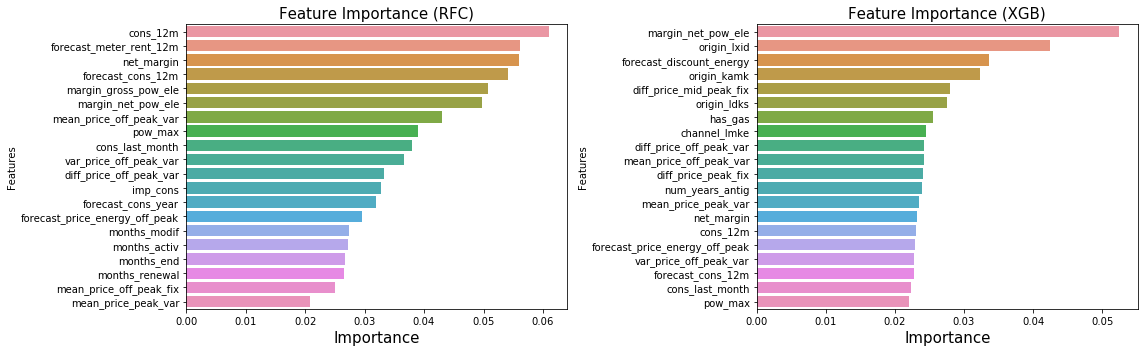

In [32]:
# Find the feature importance based on gini impurity for both RFC & XGB

important_features = pd.DataFrame({'Features': X_train.columns, 'Importance_rf': rfc.feature_importances_, 'Importance_xgb': xgb.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance_rf', ascending = False)

# create a barplot to visualize the features based on their importance (top 20)
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.barplot(x = 'Importance_rf', y = 'Features', data = important_features[:20], ax=axes.flat[0])

important_features = important_features.sort_values('Importance_xgb', ascending = False)
sns.barplot(x = 'Importance_xgb', y = 'Features', data = important_features[:20], ax=axes.flat[1])

# add plot and axes labels
# set text size using 'fontsize'

axes.flat[0].set_title('Feature Importance (RFC)', fontsize = 15)
axes.flat[1].set_title('Feature Importance (XGB)', fontsize = 15)

for i in range(2):
    axes.flat[i].set_xlabel('Importance', fontsize = 15)

# display the plot
plt.tight_layout()
plt.show()

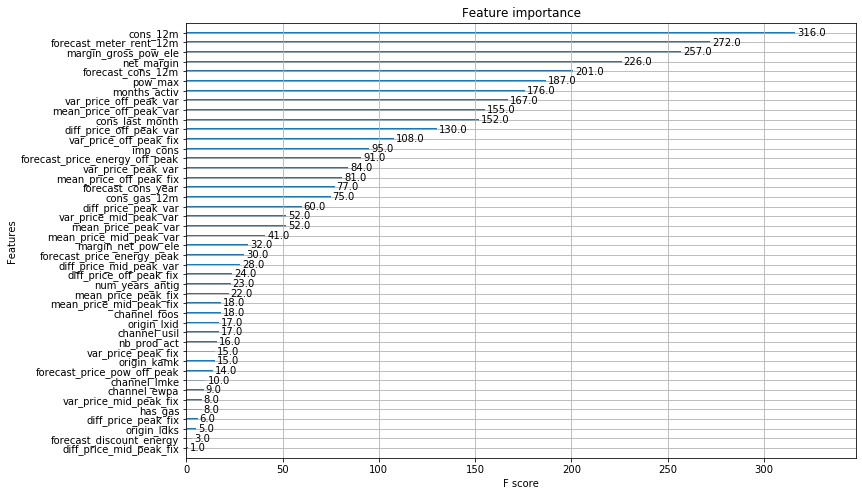

In [33]:
# Plotting using inbuilt function of xgboost

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
xgboost.plot_importance(xgb, ax=ax)

In [34]:
# Build Random Forest model based on best 20 features selected above

imp_feat = important_features.sort_values('Importance_rf', ascending = False).Features[:20].values
X = client_prices[imp_feat]
y = client_prices['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)

rfc_20 = RandomForestClassifier(n_estimators = 100, random_state = 10)
rfc_20.fit(X_train, y_train)
y_train_pred = rfc_20.predict(X_train)
y_test_pred = rfc_20.predict(X_test)

print(classification_report(y_test, y_test_pred))

df_scores.loc['Random Forest_Best20'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3336
           1       0.78      0.06      0.11       316

    accuracy                           0.92      3652
   macro avg       0.85      0.53      0.53      3652
weighted avg       0.91      0.92      0.88      3652



In [35]:
# Build XGBoost model based on best 20 features selected above

imp_feat = important_features.sort_values('Importance_xgb', ascending = False).Features[:20].values
X = client_prices[imp_feat]
y = client_prices['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

xgb_20 = xgboost.XGBClassifier(n_estimators = 100, random_state = 12)
xgb_20.fit(X_train, y_train)
y_train_pred = xgb_20.predict(X_train)
y_test_pred = xgb_20.predict(X_test)

print(classification_report(y_test, y_test_pred))
df_scores.loc['XGBoost_Best20'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]

[01:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2668
           1       0.36      0.09      0.14       254

    accuracy                           0.91      2922
   macro avg       0.64      0.54      0.55      2922
weighted avg       0.87      0.91      0.88      2922



In [36]:
df_scores

# Performance of RandomForest model has improved while for XGBoost, it reduces

,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.750000,0.056962,0.105882,0.916758,0.094825
XGBoost,0.478261,0.104430,0.171429,0.912651,0.144908
Random Forest_Best20,0.782609,0.056962,0.106195,0.917032,0.095576
XGBoost_Best20,0.360656,0.086614,0.139683,0.907255,0.109709


## 7. Model Finetuning

In [38]:
X = client_prices.drop(['id','churn'], 1)
y = client_prices['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
params = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': range(100, 500),
                     'max_depth': range(5,50),
                     'min_samples_split': range(2,50),
                     'min_samples_leaf': range(1,50)}]

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = RandomizedSearchCV(estimator = random_forest_classification, param_distributions = params, scoring='roc_auc', cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

# Best parameters for random forest classifier:  
# {'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 88, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 10} 

Best parameters for random forest classifier:  {'n_estimators': 239, 'min_samples_split': 31, 'min_samples_leaf': 10, 'max_depth': 24, 'criterion': 'entropy'} 



In [40]:
# Now build Model with chosen optimum hyperparameters

rfc_best = RandomForestClassifier(criterion = 'entropy',  n_estimators = 239, max_depth=24, min_samples_leaf=10, min_samples_split=31)
rfc_best.fit(X_train, y_train)
y_train_pred = rfc_best.predict(X_train)
y_test_pred = rfc_best.predict(X_test)

In [41]:
y_pred_prob = rfc_best.predict_proba(X_test)[:,1]
scores = pd.DataFrame(columns=['Precision','Recall','Accuracy','f1-score','Kappa'])
for threshold in np.arange(0,0.35,0.05):
    y_pred_new = [0 if x<threshold else 1 for x in y_pred_prob]
    scores.loc[threshold,:] = [precision_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new), f1_score(y_test, y_pred_new), cohen_kappa_score(y_test, y_pred_new)]
scores
# Precision and recall for 1 can be improved by setting a better threshold

,Precision,Recall,Accuracy,f1-score,Kappa
0.00,0.0865279,1,0.0865279,0.159274,0
0.05,0.099509,0.962025,0.243428,0.180362,0.0279048
0.10,0.142482,0.686709,0.615279,0.235998,0.108183
0.15,0.21037,0.449367,0.806407,0.286579,0.191249
0.20,0.273356,0.25,0.877601,0.261157,0.194576
0.25,0.293103,0.107595,0.900329,0.157407,0.116345
0.30,0.512195,0.0664557,0.913746,0.117647,0.0997549


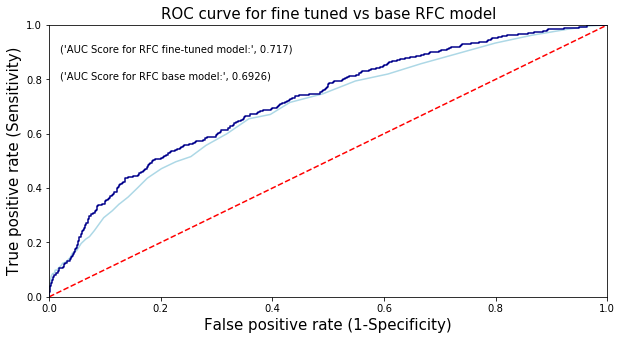

In [42]:
# Plot ROC curve

plt.figure(figsize=(10,5))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='lightblue')
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for RFC base model:',round(roc_auc_score(y_test, y_pred_prob),4)))

y_pred_prob = rfc_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='darkblue')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for RFC fine-tuned model:',round(roc_auc_score(y_test, y_pred_prob),4)))

## Labelling
plt.title('ROC curve for fine tuned vs base RFC model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.show()

# AUC score is increased to 0.71

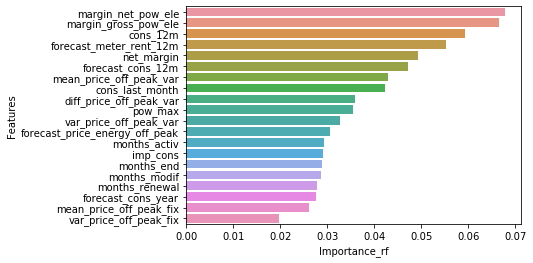

In [43]:
# Feature importance for fine tuned model

important_features = pd.DataFrame({'Features': X_train.columns, 'Importance_rf': rfc_best.feature_importances_})

important_features = important_features.sort_values('Importance_rf', ascending = False)

# fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.barplot(x = 'Importance_rf', y = 'Features', data = important_features[:20])

In [44]:
print('The most important features based on gini impurity for predicting churn are :-')
print(important_features.Features[:20].values)

The most important features based on gini impurity for predicting churn are :-
['margin_net_pow_ele' 'margin_gross_pow_ele' 'cons_12m'
 'forecast_meter_rent_12m' 'net_margin' 'forecast_cons_12m'
 'mean_price_off_peak_var' 'cons_last_month' 'diff_price_off_peak_var'
 'pow_max' 'var_price_off_peak_var' 'forecast_price_energy_off_peak'
 'months_activ' 'imp_cons' 'months_end' 'months_modif' 'months_renewal'
 'forecast_cons_year' 'mean_price_off_peak_fix' 'var_price_off_peak_fix']
